**1.- Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.**

In [2]:
#Conección a drive y carga de paqueterias
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


**2.- Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.**

In [3]:
#Generando dataset
happiness= pd.read_csv('/content/drive/MyDrive/Data science/Happiness_report.csv')

In [4]:
happiness.sample(25)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
93,94,Vietnam,5.175,0.741,1.346,0.851,0.543,0.147,0.073
96,97,Bulgaria,5.011,1.092,1.513,0.815,0.311,0.081,0.004
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
139,140,India,4.015,0.755,0.765,0.588,0.498,0.200,0.085
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033
78,79,Turkey,5.373,1.183,1.360,0.808,0.195,0.083,0.106
31,32,Brazil,6.300,1.004,1.439,0.802,0.390,0.099,0.086
95,96,Cameroon,5.044,0.549,0.910,0.331,0.381,0.187,0.037
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
35,36,Italy,6.223,1.294,1.488,1.039,0.231,0.158,0.030


**3.- A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice. **

In [5]:
#creando el subdataframe (mexico)
mexico=happiness.loc[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico.head()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


**4.- Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. Ejemplo:**

Text(Country or region
Mexico    6.595
Name: Score, dtype: float64, 0, 'MEX')

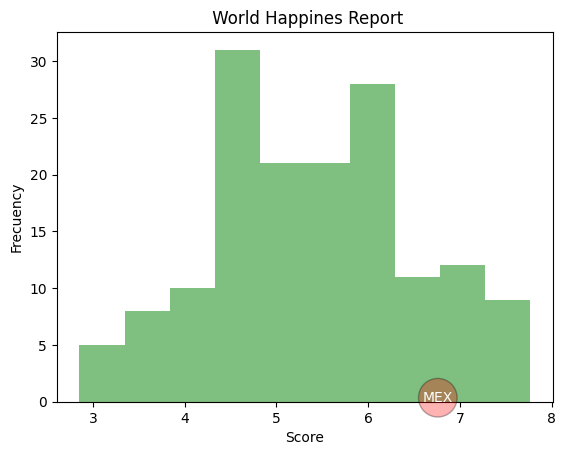

In [6]:
#Grafica
plt.hist(happiness['Score'],color='green',alpha=.5)
#Titulos y leyendas
plt.title(' World Happines Report')
plt.xlabel('Score')
plt.ylabel('Frecuency')
#Anotaciones
props_bbox = {'boxstyle': 'circle','facecolor': 'red','alpha': 0.3}
plt.text(mexico['Score'],0,'MEX',bbox=props_bbox,color='w')

** texto en cursiva5.- Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.**

Text(1.15, Country or region
Mexico    0.871
Name: Healthy life expectancy, dtype: float64, '')

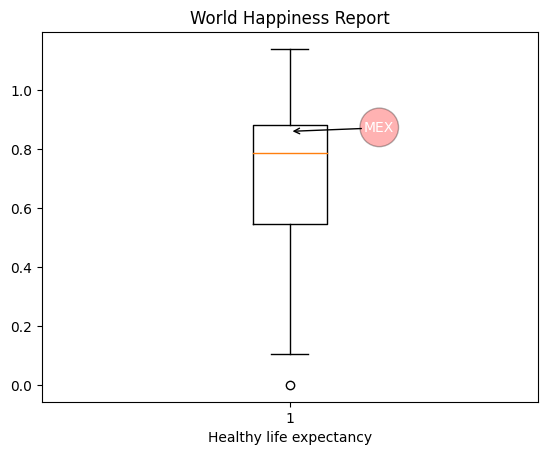

In [7]:
#Gráfica
plt.boxplot(happiness['Healthy life expectancy'])
#Titulos y leyendas
plt.title('World Happiness Report')
plt.xlabel("Healthy life expectancy")
#Anotaciones
valor=[1.15,mexico['Healthy life expectancy']]
props_bbox = {'boxstyle': 'circle','facecolor': 'red','alpha': 0.3}
plt.text(valor[0],valor[1],'MEX',bbox=props_bbox,color='w')
#Flecha
plt.annotate('',xy=(1,valor[1]),xytext=(valor[0],valor[1]+.01),arrowprops=dict(arrowstyle='->'))

**6.- Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.**

In [8]:
#Creando la tabla que se gráficara
l1=mexico.columns.tolist()
l2=mexico.iloc[0,:].tolist()

tabla_data = []
for i in range(0,len(l1)):
    tabla_data.append([l1[i],l2[i]])
print(tabla_data)

[['Overall rank', 23.0], ['Score', 6.595], ['GDP per capita', 1.07], ['Social support', 1.323], ['Healthy life expectancy', 0.861], ['Freedom to make life choices', 0.433], ['Generosity', 0.074], ['Perceptions of corruption', 0.073]]


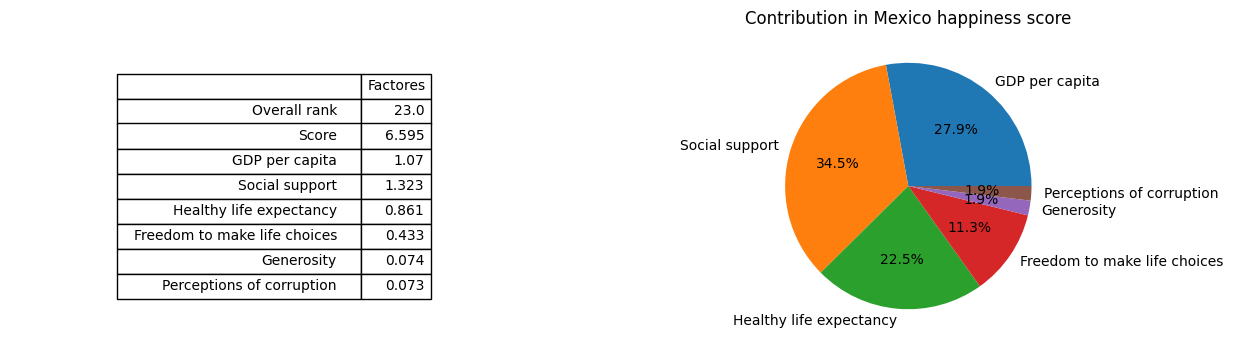

In [9]:

#Creating the box
fig, axs=plt.subplots(1,2,figsize=(15,4))

#Gráfica
labels=['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
axs[1].pie(mexico.iloc[0,2:8],labels=labels,autopct='%1.1f%%')
#Titulo
axs[1].set_title('Contribution in Mexico happiness score')
#Tabla
tabla = axs[0].table(cellText=tabla_data, colLabels=['', 'Factores'], loc='center')
tabla.auto_set_column_width([0,1])
tabla.scale(1, 1.5)
axs[0].axis('off')
plt.show()

***7.- Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.***

In [10]:
most_h=happiness.loc[happiness['Score']==happiness['Score'].max()]
less_h=happiness.loc[happiness['Score']==happiness['Score'].min()]
most_healty=happiness.loc[happiness['Healthy life expectancy']==happiness['Healthy life expectancy'].min()]
less_free=happiness.loc[happiness['Freedom to make life choices']==happiness['Freedom to make life choices'].min()]
mexico2=happiness.loc[happiness['Country or region']=='Mexico']
new_df=pd.concat([mexico2,most_h,less_h,most_healty,less_free],axis=0,ignore_index=True)
new_df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
3,135,Swaziland,4.212,0.811,1.149,0.000,0.313,0.074,0.135
4,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025


In [11]:
new_df=new_df.T
new_df=new_df[1:]
new_df.columns = new_df.iloc[0]
new_df = new_df[2:]
new_df

Country or region,Mexico,Finland,South Sudan,Swaziland,Afghanistan
GDP per capita,1.07,1.34,0.306,0.811,0.35
Social support,1.323,1.587,0.575,1.149,0.517
Healthy life expectancy,0.861,0.986,0.295,0.0,0.361
Freedom to make life choices,0.433,0.596,0.01,0.313,0.0
Generosity,0.074,0.153,0.202,0.074,0.158
Perceptions of corruption,0.073,0.393,0.091,0.135,0.025


In [12]:
new_df.index

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Text(0.5, 1.0, 'World Happiness Report')

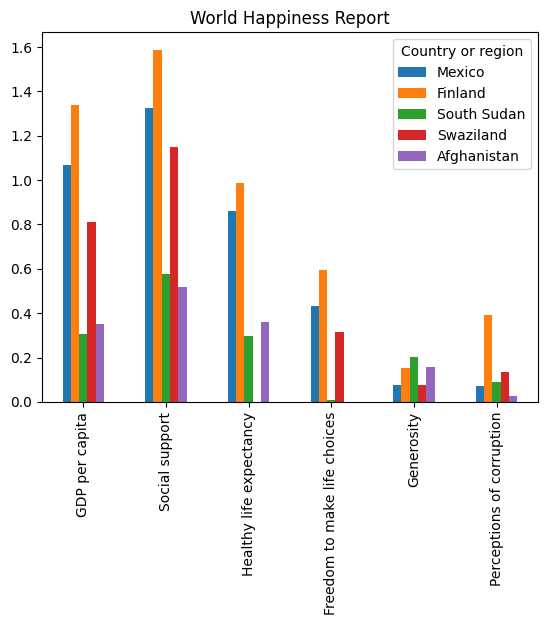

In [13]:
new_df.plot(kind='bar')
plt.title("World Happiness Report")

***8.-Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.***

In [14]:
happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Text(0.5, 0.98, 'Contribution in happiness score')

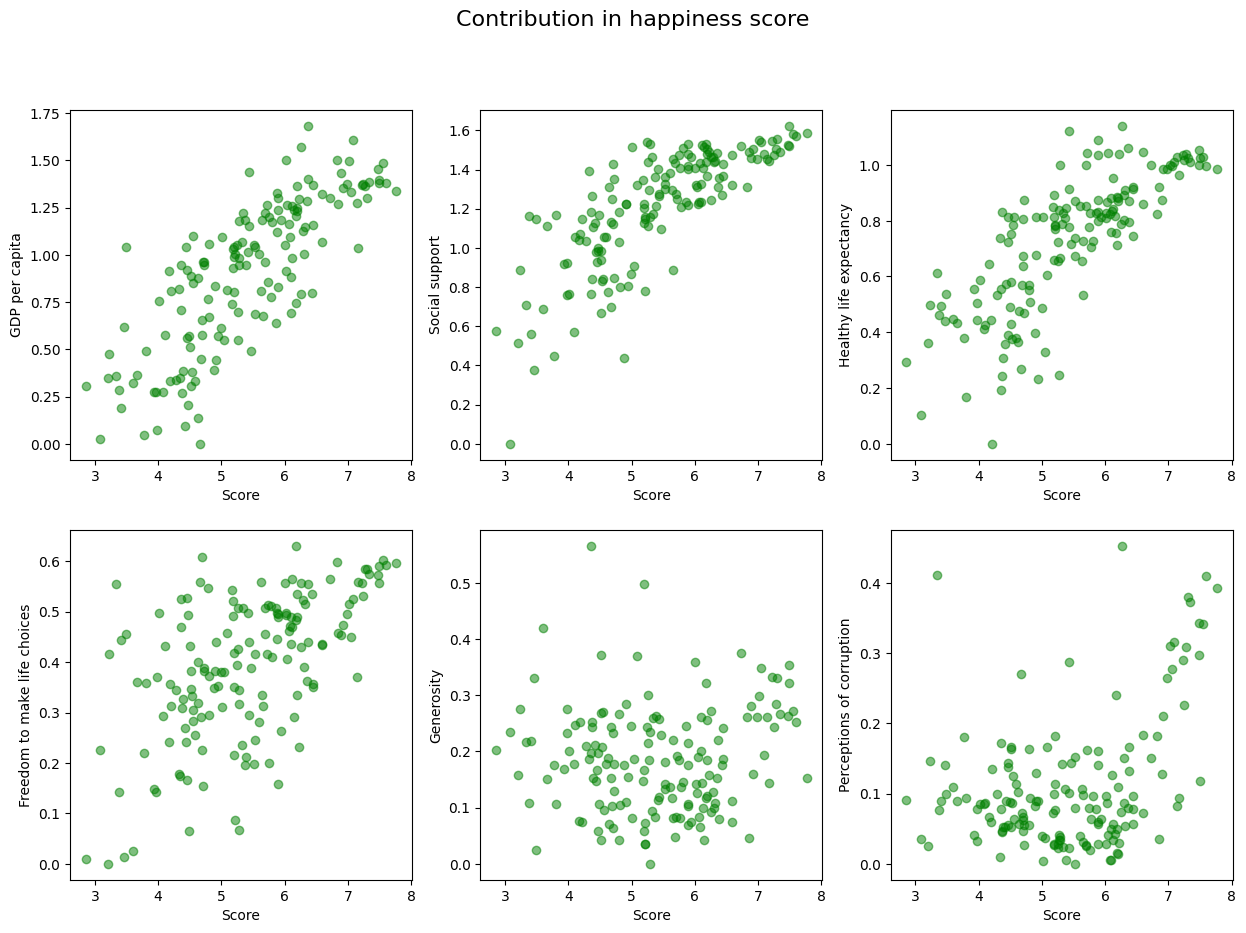

In [18]:
fig, axs=plt.subplots(2,3,figsize=(15,10))
aux=3
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].scatter(x=happiness.iloc[:,2],y=happiness.iloc[:,aux],c='green',alpha=.5)
        axs[i,j].set_ylabel(happiness.columns.tolist()[aux])
        axs[i,j].set_xlabel('Score')
        aux+=1
fig.suptitle('Contribution in happiness score',fontsize=16)

In [21]:
new_h=happiness.iloc[:,2:]
new_h.head(20)

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,7.246,1.376,1.475,1.016,0.532,0.244,0.226


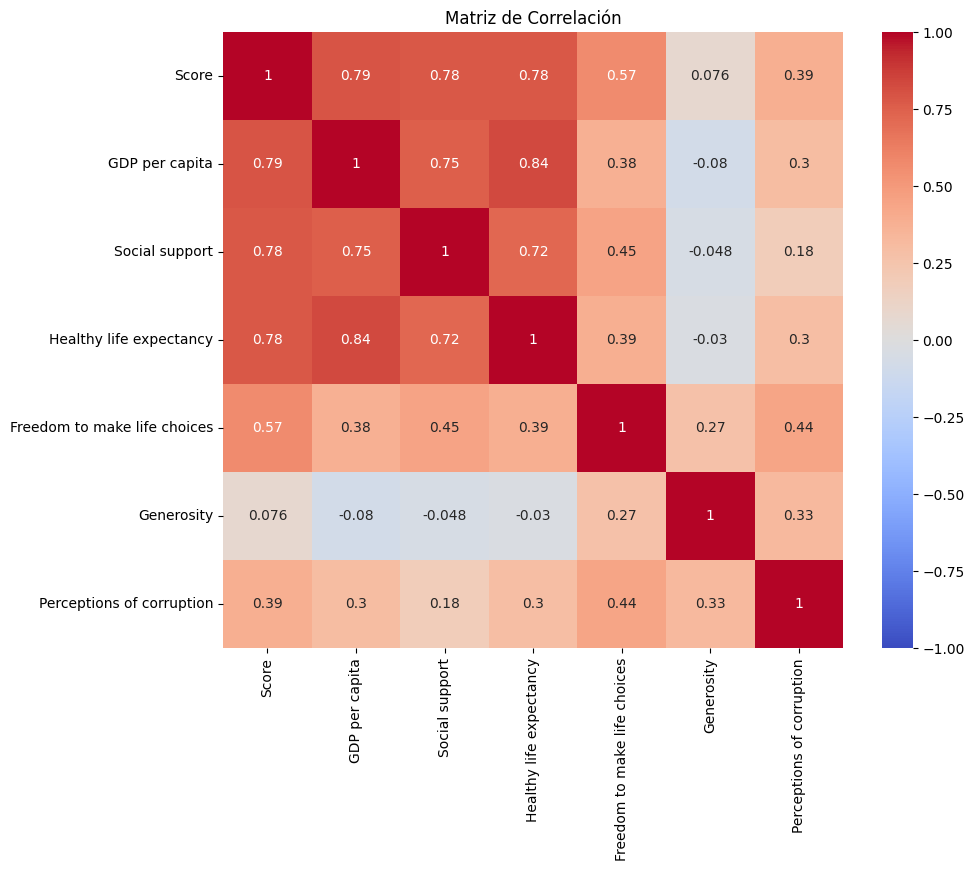

In [20]:
correlation_matrix = new_h.corr()

# Crear un heatmap con Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Añadir título
plt.title('Matriz de Correlación')

# Mostrar el heatmap
plt.show()

***9.-Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.***

In [23]:
#Generando dataset (METADATA)
metada= pd.read_csv('/content/drive/MyDrive/Data science/Metadata.csv')
metada.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFG,South Asia,Low income,NaN,Afghanistan
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania
4,AND,Europe & Central Asia,High income,NaN,Andorra


In [29]:
inf_reg=happiness.merge(metada.loc[:,["TableName","Region"]],left_on="Country or region",right_on="TableName")
inf_reg.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,TableName,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Finland,Europe & Central Asia
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Denmark,Europe & Central Asia
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Norway,Europe & Central Asia
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Iceland,Europe & Central Asia
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe & Central Asia


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'East Asia & Pacific'),
  Text(1, 0, 'Europe & Central Asia'),
  Text(2, 0, 'Latin America & Caribbean'),
  Text(3, 0, 'Middle East & North Africa'),
  Text(4, 0, 'North America'),
  Text(5, 0, 'South Asia'),
  Text(6, 0, 'Sub-Saharan Africa')])

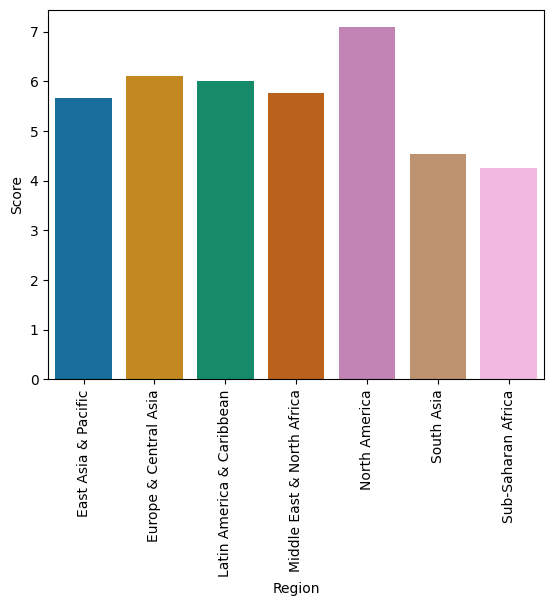

In [54]:
sns.barplot(data=df_s, x="Region", y="Score", errorbar=None, palette="colorblind")
plt.xticks(rotation=90)